In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}
// Avoid scrollable output for many plots

<IPython.core.display.Javascript object>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import itertools
import tqdm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
df = pd.read_parquet('data_2020-May-15.parquet')
print('Number cars: {}'.format(df.shape[0]));
df.head()

Number cars: 103


,headline,year,odometer,price,description,horsepower,region,fuelTypeGasoline,engineSize,trim
0,"Peugeot 5008 2,0 HDi 150 Premium 7prs 5d",2010,152000.0,99900.0,OBS: I Forbindelse Med COVID-19/Coronavirus!\n...,150.0,Syd- og Vestsjælland,False,"2,0",Premium
1,"Peugeot 5008 1,5 BlueHDi 130 Allure LTD EAT8 5d",2020,7000.0,374900.0,"FÅ MINIMUM 15.000, - FOR DIN BRUGTE BIL, VED K...",130.0,Nordjylland,False,"1,5",Allure
2,"Peugeot 5008 1,2 e-THP 130 Style 7prs 5d",2016,64000.0,179500.0,"7 Pers, Lav Ejerafgift KUN 330.- Halvårlig, 13...",130.0,Vestjylland,True,"1,2",Style
3,"Peugeot 5008 1,6 BlueHDi 120 Allure 5d",2017,40000.0,289800.0,Fantastisk Familiebil Med Masser Af Plads Og 7...,120.0,København,False,"1,6",Allure
4,"Peugeot 5008 2,0 BlueHDi 180 GT EAT6 5d",2017,80000.0,389900.0,"Aut.Gear/Tiptronic, 2 Zone Klima, Køl I Handsk...",180.0,Fyn,False,"2,0",GT


In [2]:
df[df.isnull().any(axis=1)]

,headline,year,odometer,price,description,horsepower,region,fuelTypeGasoline,engineSize,trim
25,"Peugeot 5008 1,2 PT 130 Active EAT8 5d",2019,3000.0,344500.0,">>> KAN KØBES UDEN UDBETALING <<<, DEN POPULÆR...",130.0,Syd- og Sønderjylland,True,"1,2",None
26,"Peugeot 5008 1,5 BlueHDi 130 Active 5d",2019,26000.0,309500.0,">>> KAN KØBES UDEN UDBETALING <<<, DEN POPULÆR...",130.0,Syd- og Sønderjylland,False,"1,5",None
47,"Peugeot 5008 1,6 HDi 112 Active 5d",2013,138000.0,109000.0,"7 Personers, Fjernb. C.Lås, 16"" Alufælge Somme...",112.0,København,False,"1,6",None
57,"Peugeot 5008 1,6 HDi 112 7prs 5d",2011,244000.0,89000.0,"ABS-bremser, Aircondition, Alufælge, Anhængert...",112.0,Østjylland,False,"1,6",None
67,"Peugeot 5008 1,6 HDi 112 7prs 5d",2011,143000.0,89800.0,"HYSTERISK VELHOLDT!!!, 16"" Alufælge, Fuldaut. ...",112.0,Syd- og Sønderjylland,False,"1,6",None
69,"Peugeot 5008 1,2 e-THP 130 Active EAT6 5d",2018,38000.0,299900.0,Køb Bilen Online (TLF 75801011) Og Få Dette Gr...,130.0,Syd- og Sønderjylland,True,"1,2",None
71,"Peugeot 5008 1,2 PT 130 Limited 5d",2020,NaN,359200.0,"Fjernb. C.Lås, Parkeringssensor, Ratgearskifte...",130.0,Syd- og Sønderjylland,True,"1,2",None
76,"Peugeot 5008 1,2 e-THP 130 Active EAT6 5d",2018,27000.0,289900.0,"EAT-6 Automatgear, 17"" Alufælge, 2 Zone Klima,...",130.0,Syd- og Vestsjælland,True,"1,2",None
83,"Peugeot 5008 1,5 BlueHDi 130 Active EAT8 5d",2019,28000.0,349900.0,"7 Sæder, Apple Carplay M/ Navigation, 2 Zone K...",130.0,Østjylland,False,"1,5",None
87,"Peugeot 5008 1,2 e-THP 130 Active EAT6 5d",2018,38000.0,279900.0,"- SUPER SKARP PRIS - 279,900 Kr - 7 Personer's...",130.0,Nordsjælland,True,"1,2",None


In [3]:
df.describe()

,year,odometer,price,horsepower
count,103.000000,102.000000,103.000000,103.000000
mean,2015.796117,88356.294118,243639.126214,127.349515
std,3.490489,83897.861006,129900.656205,19.545677
min,2009.000000,3000.000000,24000.000000,109.000000
25%,2012.000000,14100.000000,99900.000000,114.000000
50%,2017.000000,55000.000000,289900.000000,120.000000
75%,2019.000000,149000.000000,339900.000000,130.000000
max,2020.000000,383000.000000,469900.000000,180.000000


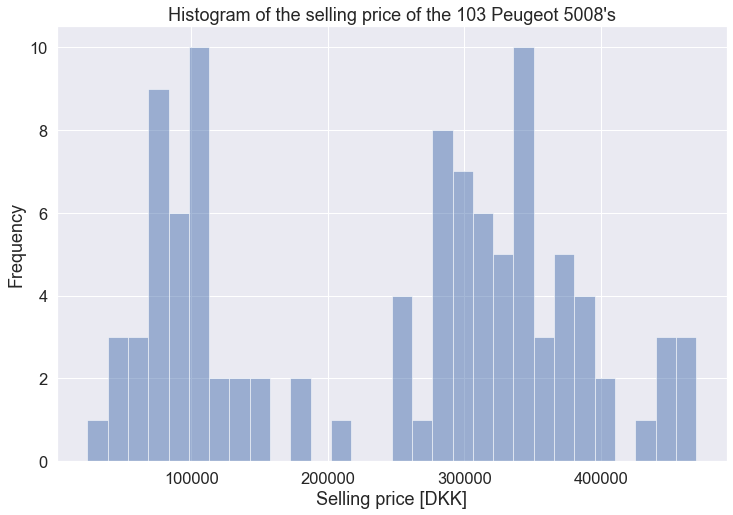

In [5]:
plt.rcParams["figure.figsize"] =(12,8)
ax = df['price'].plot.hist(bins=30, alpha=0.5);
ax.set_xlabel('Selling price [DKK]');
ax.set_title(f"Histogram of the selling price of the {df.shape[0]} Peugeot 5008's");

In [6]:
# Plot correlation matrix
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price,horsepower,fuelTypeGasoline
year,1.00,-0.89,0.94,0.54,0.33
odometer,-0.89,1.00,-0.89,-0.50,-0.31
price,0.94,-0.89,1.00,0.69,0.30
horsepower,0.54,-0.50,0.69,1.00,0.33
fuelTypeGasoline,0.33,-0.31,0.30,0.33,1.00


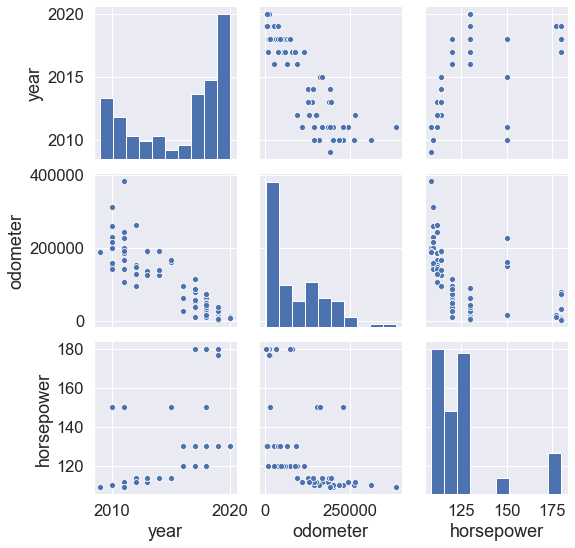

In [7]:
sns.pairplot(df[['year', 'odometer', 'horsepower']].copy());

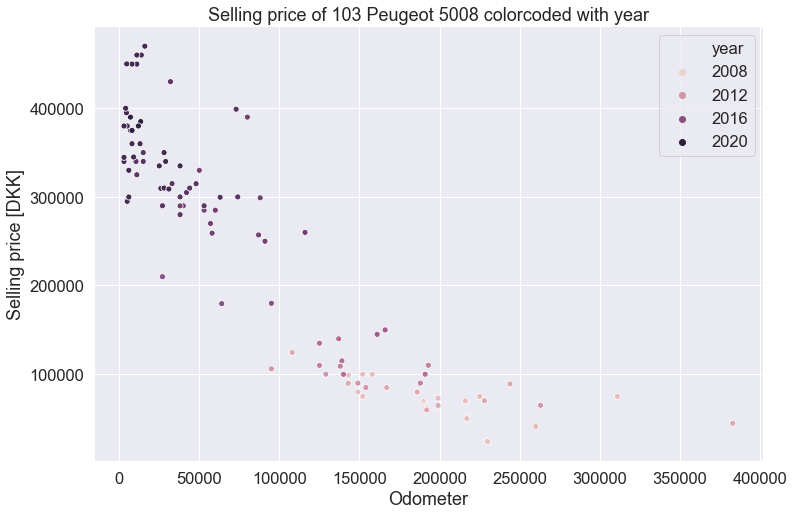

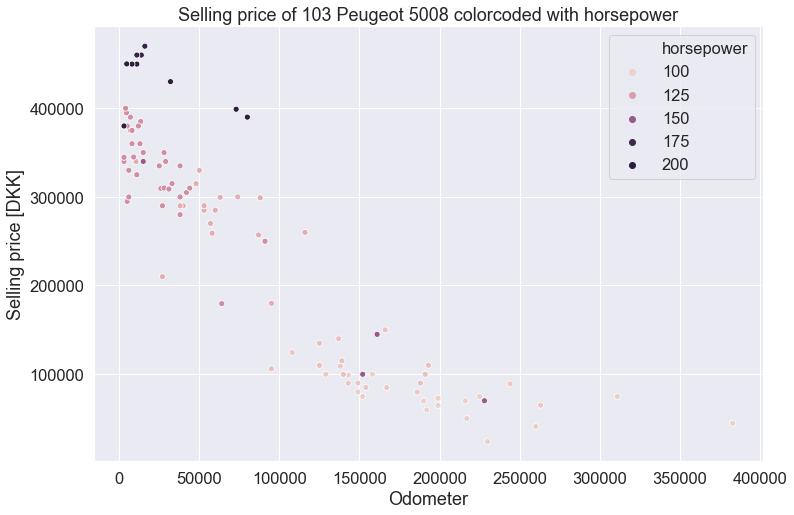

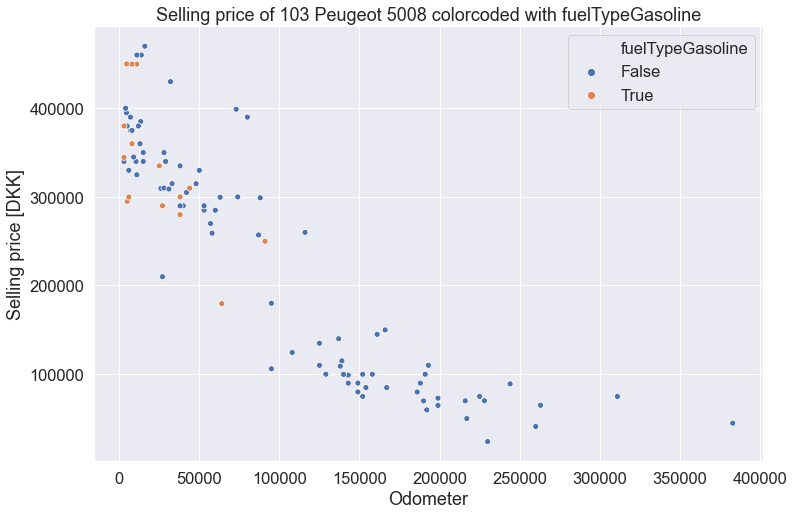

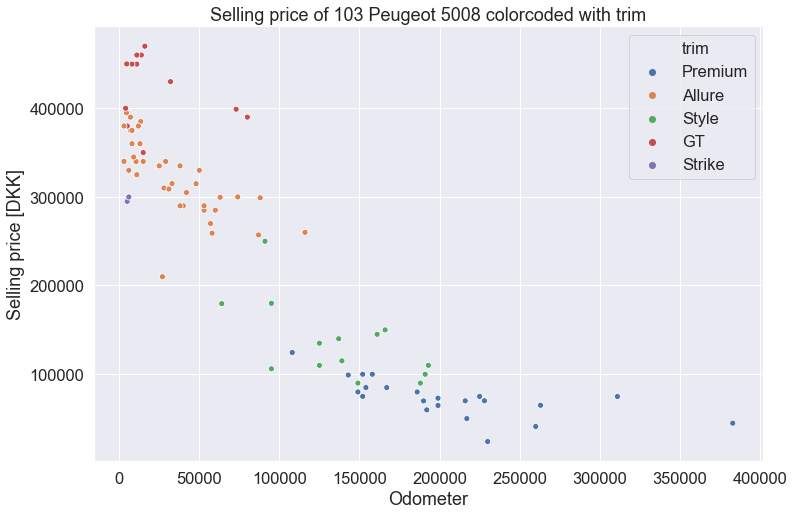

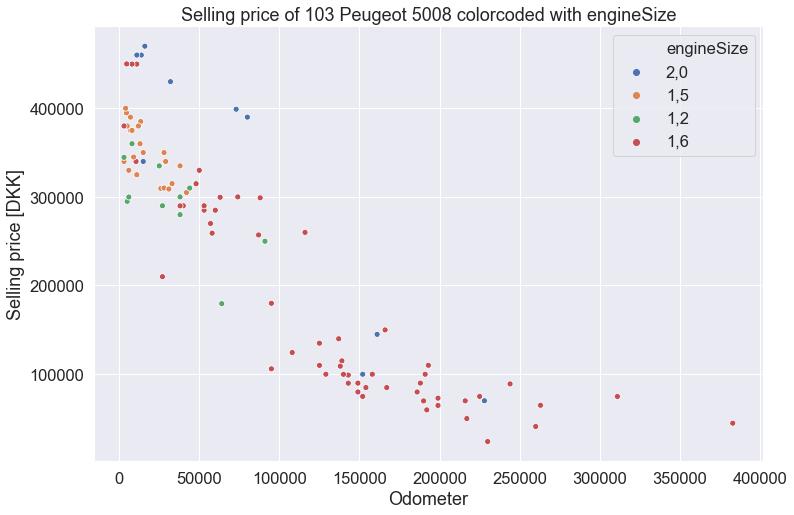

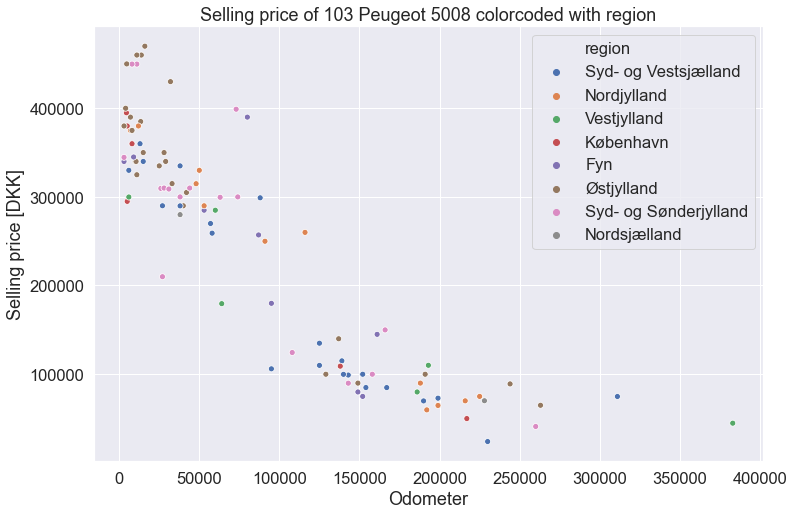

In [10]:
plt.rcParams["figure.figsize"] =(12,8)
for hue in [
    'year',
    'horsepower',
    #'transmissionManual',
    'fuelTypeGasoline',
    #'carTypeStationCar',
    'trim',
    'engineSize',
    'region']:
    ax = sns.scatterplot(x="odometer", y="price", hue=hue, data=df)
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df.shape[0]} Peugeot 5008 colorcoded with {hue}');
    plt.show()

# Selected

In [27]:
# Find cars comparable to my own
df_selected = df[
    (df.trim == 'Style')
]
print(f'Number of selected cars: {df_selected.shape[0]}')
df_selected.head()

Number of selected cars: 14


,headline,year,odometer,price,description,horsepower,region,fuelTypeGasoline,engineSize,trim
2,"Peugeot 5008 1,2 e-THP 130 Style 7prs 5d",2016,64000.0,179500.0,"7 Pers, Lav Ejerafgift KUN 330.- Halvårlig, 13...",130.0,Vestjylland,True,"1,2",Style
6,"Peugeot 5008 2,0 BlueHDi 150 Style 7prs 5d",2015,161000.0,144900.0,FORÅRS KAMPAGNE\nÅBENT ALLE UGENS DAGE 10-17 \...,150.0,Fyn,False,"2,0",Style
12,"Peugeot 5008 1,6 HDi 114 Style 7prs 5d",2014,137000.0,139900.0,BEMÆRK!\n- Rigtig God Indstignings Højde.\n- M...,114.0,Østjylland,False,"1,6",Style
37,"Peugeot 5008 1,6 HDi 114 Style 7prs 5d",2014,139000.0,115000.0,"ABS-bremser, Alufælge, Anhængertræk, aftagl., ...",114.0,Syd- og Vestsjælland,False,"1,6",Style
46,"Peugeot 5008 1,2 e-THP 130 Style 7prs 5d",2017,91000.0,249900.0,"7 Personers, Vi Tilbyder Ekstra Garantiforsikr...",130.0,Nordjylland,True,"1,2",Style


In [28]:
df_selected.describe()

,year,odometer,price,horsepower
count,14.000000,14.000000,14.000000,14.000000
mean,2014.142857,137071.428571,135678.571429,119.142857
std,1.511858,40647.574032,44143.039848,10.661629
min,2012.000000,64000.000000,89900.000000,112.000000
25%,2013.000000,102500.000000,106975.000000,114.000000
50%,2014.000000,138000.000000,124950.000000,114.000000
75%,2015.000000,164750.000000,148650.000000,118.500000
max,2017.000000,193000.000000,249900.000000,150.000000


In [29]:
# Plot correlation matrix
corr = df_selected[['year', 'odometer', 'price']].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap=cmap);
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price
year,1.00,-0.44,0.91
odometer,-0.44,1.00,-0.62
price,0.91,-0.62,1.00


In [38]:
df_selected.year.unique()

array([2016, 2015, 2014, 2017, 2012, 2013])

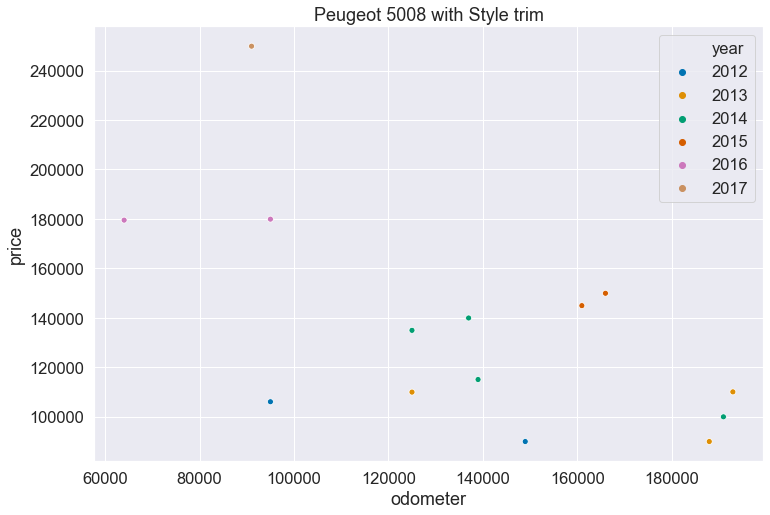

In [42]:
plt.rcParams["figure.figsize"] = (12,8)

ax = sns.scatterplot(
    x="odometer",
    y="price",
    hue="year",
    data=df_selected,
    palette=sns.color_palette("colorblind", 6),
    #size="horsepower"
)
ax.set_title('Peugeot 5008 with Style trim');